# Naloga 2: Mangan

V datoteki Mangan so podatki o deležu mangana v železu, pridobljenem v plavžu:
skozi 24 dni so vsak dan analizirali pet odlitkov. Preučite normalnost dobljene
empirične porazdelitve.

In [559]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [560]:
Mangan = pd.read_csv("Mangan.csv")
Mangan

,dan,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5
0,1,1.40,1.28,1.36,1.38,1.44
1,2,1.40,1.34,1.54,1.44,1.46
2,3,1.80,1.44,1.46,1.50,1.38
3,4,1.54,1.50,1.48,1.52,1.58
4,5,1.52,1.46,1.42,1.58,1.70
5,6,1.62,1.58,1.62,1.76,1.60
6,7,1.58,1.64,1.62,1.72,1.60
7,8,1.62,1.46,1.38,1.42,1.38
8,9,1.60,1.44,1.46,1.38,1.34
9,10,1.38,1.34,1.36,1.58,1.38


**Širino posameznega razreda določite v skladu z modificiranim Freedman–Diaconisovim pravilom.**

In [561]:
delezi = Mangan.odlitek1.tolist() + Mangan.odlitek2.tolist() + Mangan.odlitek3.tolist() + Mangan.odlitek4.tolist() + Mangan.odlitek5.tolist()

In [562]:
#koda vzeta s strani http://www.jtrive.com/determining-histogram-bin-width-using-the-freedman-diaconis-rule.html

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = numpy.asarray(data, dtype=numpy.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale="raw", nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / numpy.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return result

freedman_diaconis(delezi, 'bins')

c:\Users\gajaj\AppData\Local\Programs\Python\Python38-32\lib\site-packages\scipy\stats\_stats_py.py:3171: VisibleDeprecationWarning: use of scale='raw' is deprecated, use scale=1.0 instead
  warnings.warn(


11

In [563]:
freedman_diaconis(delezi, 'width')

0.07298642394688079

**histogram z dorisano normalno gostoto**

---

In [564]:
#pričakovana vrednost se ujema s povprečjem
povprecje = numpy.mean(delezi)
povprecje

1.409

In [565]:
#standardni odklon izracunamo s pomocjo funkcije .std()
standardni_odklon = numpy.std(delezi)
standardni_odklon

0.15055120944936531

In [566]:
# gostota normalne porazdelitve
def normalna(x, pov, st):
    return 1/ (st*(2*math.pi)**0.5) * math.e**(-0.5*((x-pov)/st)**2)

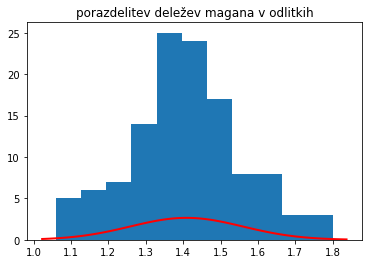

In [567]:
#histogram
from turtle import color


plt.hist(delezi, bins=11)

# PDF.
xmin, xmax = plt.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = normalna(x, povprecje, standardni_odklon)

  
plt.plot(x, p, 'k', linewidth=2, color='r')
title = "porazdelitev deležev magana v odlitkih".format(povprecje, standardni_odklon)
plt.title(title)
  
plt.show()

**viseči histogram razlik korenov frekvenc**

---

Definiramo tabelo frekvence, ki za vsako vrednost odlitka določi število ponovitev te vrednosti v posameznem odlitku.

In [568]:
#stejemo deleze
frekvence = Mangan[['odlitek1', 'odlitek2', 'odlitek3', 'odlitek4', 'odlitek5']].apply(pd.Series.value_counts)
frekvence.head(5)

,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5
1.06,NaN,NaN,NaN,1.0,NaN
1.08,NaN,NaN,1.0,1.0,NaN
1.10,NaN,NaN,1.0,NaN,1.0
1.16,1.0,NaN,NaN,2.0,NaN
1.18,NaN,NaN,NaN,3.0,NaN


Nas zanima kolikokrat se določen delež mangana pojavi na splošno ne glede na zaporedno število odlitka, zato definiramo stolpec, ki šteje vse ponovitve za določeno vrednost.

In [569]:
#dodamo stolpec z vsotami ponovitev
seznam_vsot = []
for index, row in frekvence.iterrows():
    vsota = 0
    for i in row:
        if not math.isnan(i):
            vsota += i
    seznam_vsot.append(vsota)


frekvence['vsota_ponovitev'] = seznam_vsot

In [570]:
frekvence1 = frekvence.reset_index()
frekvence1.head(5)

,index,odlitek1,odlitek2,odlitek3,odlitek4,odlitek5,vsota_ponovitev
0,1.06,NaN,NaN,NaN,1.0,NaN,1.0
1,1.08,NaN,NaN,1.0,1.0,NaN,2.0
2,1.10,NaN,NaN,1.0,NaN,1.0,2.0
3,1.16,1.0,NaN,NaN,2.0,NaN,3.0
4,1.18,NaN,NaN,NaN,3.0,NaN,3.0


In [571]:
#preimenujemo stolpec
frekvence2 = frekvence1.rename(columns={'index':'vrednost'})

#definiramo novo tabelo, ki vsebuje le vrednosti, ki jih potrebujemo
frekvence3 = frekvence2[['vsota_ponovitev', 'vrednost']]

Za vsako od vrednosti potrebujemo še število ponovitev te vrednosti če bi imeli normalno porazdelitev

In [572]:
#definirajmo seznam ponovitev normalne
ponovitve_normalne = []
for i in frekvence3.vrednost:
    x0 = i - 0.02
    x1 = i + 0.02  #i bo ravno sredisce intervala
    p = norm.cdf((x1-povprecje)/standardni_odklon) - norm.cdf((x0-povprecje)/standardni_odklon)
    n = 30
    ponovitve_normalne.append(n*p)

frekvence3['ponovitve_normalne'] = ponovitve_normalne
frekvence3.head(10)

<ipython-input-572-f4bf12c52905>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frekvence3['ponovitve_normalne'] = ponovitve_normalne


,vsota_ponovitev,vrednost,ponovitve_normalne
0,1.0,1.06,0.219306
1,2.0,1.08,0.295259
2,2.0,1.10,0.390603
3,3.0,1.16,0.813981
4,3.0,1.18,1.003847
5,1.0,1.20,1.216468
6,2.0,1.22,1.448487
7,1.0,1.24,1.694762
8,3.0,1.26,1.948423
9,8.0,1.28,2.201092


Izračunamo še razliko med ponovitvami.

In [573]:
list = []
for i in range(31):
    razlika = math.sqrt(frekvence3.vsota_ponovitev[i]) - math.sqrt(frekvence3.ponovitve_normalne[i])
    list.append(razlika)

In [574]:
frekvence3['razlika'] = list
frekvence3.head(10)

<ipython-input-574-ab97270c489e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frekvence3['razlika'] = list


,vsota_ponovitev,vrednost,ponovitve_normalne,razlika
0,1.0,1.06,0.219306,0.531699
1,2.0,1.08,0.295259,0.870836
2,2.0,1.10,0.390603,0.789231
3,3.0,1.16,0.813981,0.829842
4,3.0,1.18,1.003847,0.730129
5,1.0,1.20,1.216468,-0.102936
6,2.0,1.22,1.448487,0.210683
7,1.0,1.24,1.694762,-0.301830
8,3.0,1.26,1.948423,0.336192
9,8.0,1.28,2.201092,1.344819


Narišemo histogram

<AxesSubplot:xlabel='vrednost'>

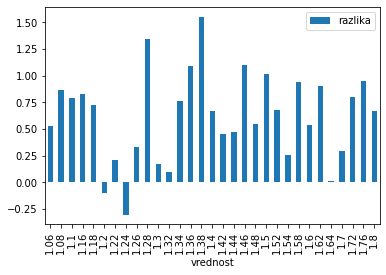

In [575]:
frekvence3.plot.bar(x='vrednost', y='razlika')

**primerjalni kvantilni (Q–Q) grafikon**

---

In [576]:
#dodamo stolpec z povprečji
Mangan['povprecje'] = (Mangan.odlitek1 + Mangan.odlitek2 + Mangan.odlitek3 + Mangan.odlitek4 + Mangan.odlitek5) / 5

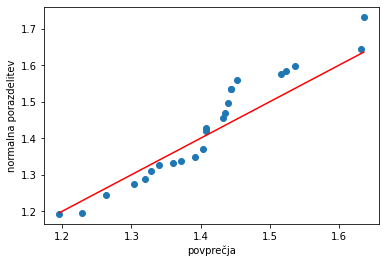

In [577]:
#obravnavamo povprečja deležev
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,24)
podatki_normalne.sort()

seznam_povprecij = Mangan.povprecje.tolist()
seznam_povprecij.sort()

plt.scatter(seznam_povprecij,podatki_normalne)
plt.plot([min(seznam_povprecij),max(seznam_povprecij)],[min(seznam_povprecij),max(seznam_povprecij)],color="red")

plt.xlabel("povprečja")
plt.ylabel("normalna porazdelitev")
plt.show()

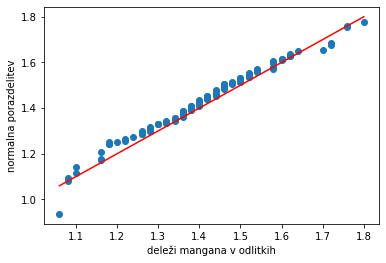

In [578]:
#obravnavamo vse deleže
podatki_normalne = numpy.random.normal(povprecje,standardni_odklon,len(delezi))
podatki_normalne.sort()

delezi.sort()

plt.scatter(delezi,podatki_normalne)
plt.plot([min(delezi),max(delezi)],[min(delezi),max(delezi)],color="red")

plt.xlabel("deleži mangana v odlitkih")
plt.ylabel("normalna porazdelitev")
plt.show()